In [1]:
# setup
# %pylab
# %pylab inline
# %matplotlib inline
# %autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tqdm

import random

from PIL import Image
from IPython.display import display

In [2]:
#load dataframe

iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_df = pd.read_csv(
    iris_url, header=None, 
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])

### Zadanie 0.
Zaimplementuj algorytm K-Means. Postaraj się, żeby implementacja była efektywna, bo będzie on w przyszłości używany do przetwarzania dużych zbiorów danych. Sprawdź działanie zaimplementowanego algorytmu na danych IRIS.

In [143]:
c = iris_df.sample(2)
c.iloc[0]

sepal_length                5.8
sepal_width                 2.6
petal_length                  4
petal_width                 1.2
target          Iris-versicolor
Name: 92, dtype: object

In [5]:
def k_means(data, k, max_iters = 100, max_err_rate=1e-10):
    '''
    returns tuple of group classification and centroids
    '''
    def calc_dists(data, c):
        return -2 * np.dot(data, c.T) + np.array(np.sum(c**2, axis=1))
    
    err_rate = 1

    # initialize centriods
#     c = df.sample(k).to_numpy()
    c = np.random.permutation(data)[:k]

    iters = 0
    pbar = tqdm.tqdm(total=max_iters, desc='k_means', position=0, leave=True)
    while err_rate > max_err_rate and iters < max_iters:
        pbar.update(1)
        iters += 1
        
        # calculate distances and assign to groups
        dists = calc_dists(data, c)
        groups = dists.argmin(axis=1)

        # update centroids
        counts = np.ones(k)

        sums = np.zeros((k, len(c[0])))
        for i in range(len(data)):
            counts[groups[i]] += 1
#             sums[groups[i]] += df.iloc[i]
            sums[groups[i]] += data[i, :]

        c_new = sums / counts[:,np.newaxis]
#         print(f'counts: ', counts)
        
        err_rate = np.max(np.abs(c - c_new))
        c = c_new
    
    pbar.close()
    return (groups, c)
    

print(k_means(np.array(iris_df.iloc[:,:-1]), 3))

k_means:   9%|▉         | 9/100 [00:00<00:00, 825.52it/s]

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([[5.47058824, 2.55882353, 3.90882353, 1.21470588],
       [6.47352941, 2.94411765, 5.26029412, 1.85735294],
       [4.90784314, 3.35098039, 1.43529412, 0.23921569]]))


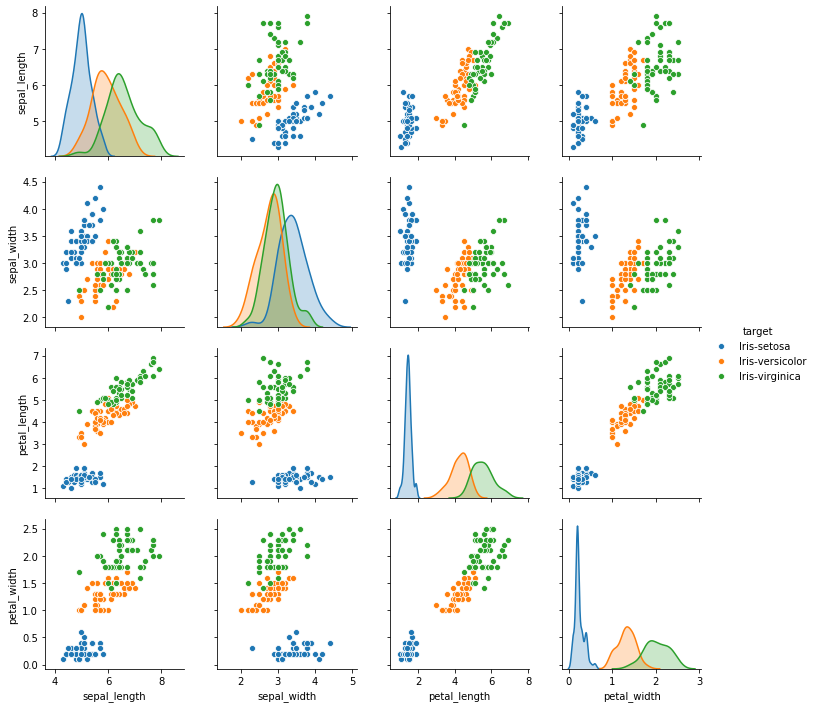

In [6]:
# draw plots
sns.pairplot(hue='target', data=iris_df)

k_means:   7%|▋         | 7/100 [00:00<00:00, 1089.71it/s]


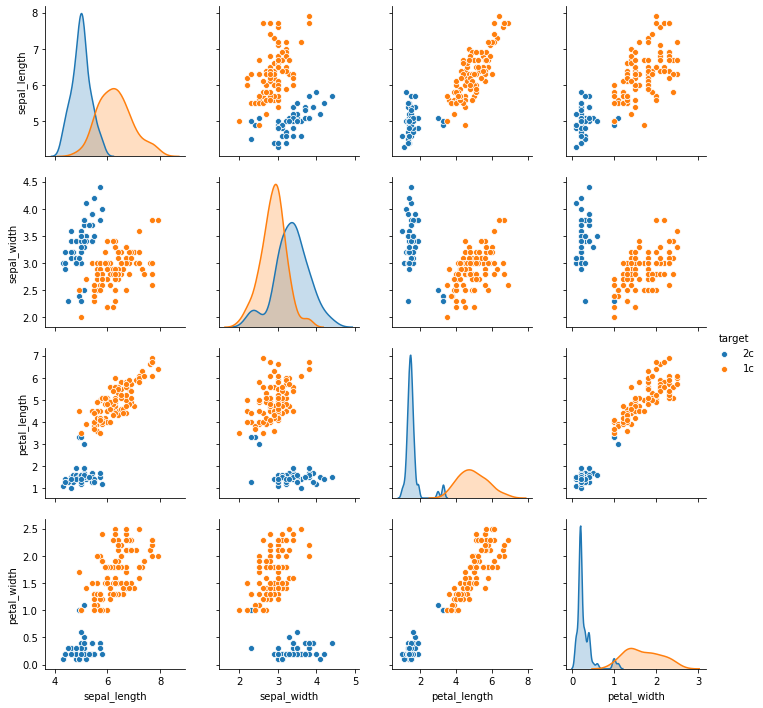

In [8]:
iris_kmeans_df = iris_df.iloc[:,:-1]
iris_kmeans_df['target'] = list(map(lambda x : str(x) + 'c', k_means(np.array(iris_kmeans_df), 3)[0]))
# iris_kmeans_df
sns.pairplot(hue='target', data=iris_kmeans_df)

### Zadanie 1.
Napisz program, który generuje zbiór N = 5000 losowych wektorów danych z mieszaniny rozkładów gaussowskich o niżej podanych parametrach i sprawdź działanie algorytmu K-Means na tym zbiorze (rozkład Choleskiego macierzy kowariancji można w Matlabie uzyskać poleceniem chol, a w Pythonie poleceniem cholesky).

In [199]:
def generate(N, d, K, p, mi, sigma):
    distributions_ids = random.choices(range(K), k=N, weights=p)
    res = np.random.randn(N, d)

    L = np.linalg.cholesky(sigma)
    
    for i in tqdm.tqdm(range(N), desc='generate'):
        res[i, :] = mi[distributions_ids[i], :] + np.dot(L[distributions_ids[i], :, :], res[i, :])
    return np.array(res)

def draw(X, K):
    plt.scatter(x=X[:, 0], y=X[:, 1], marker='.')
    plt.figure()
    plt.scatter(x=X[:, 0], y=X[:, 1], c=k_means(X, K)[0], marker='.')

In [200]:
N, d, K = 5000, 2, 5
p = np.ones(K) / K
mi = 3 * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
sigma = np.array([np.eye(d)] * K)

a) d=2, K=5, p=1/K * 1, μk = 3k * 1, Σk = I (dla k = 1, 2, ..., K)


k_means:   9%|▉         | 9/100 [00:00<00:01, 68.04it/s]


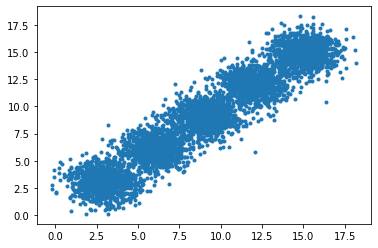

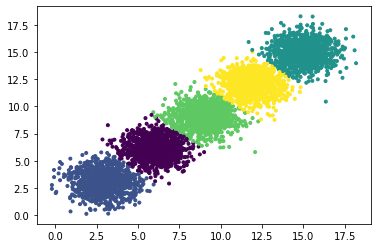

In [201]:
X = generate(N, d, K, p, mi, sigma)
draw(X, K)

b) jak w a), oprócz Σ3 = [30;01]


k_means:  13%|█▎        | 13/100 [00:00<00:01, 73.38it/s]


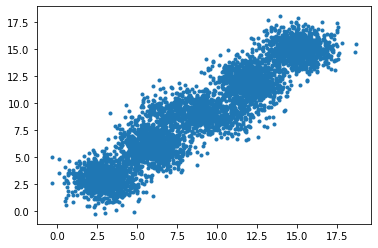

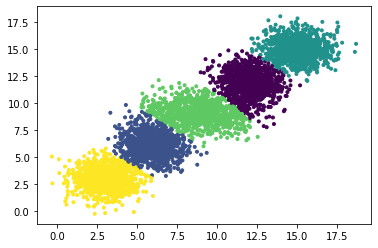

In [202]:
sigma[2, 0] = [3, 0]

X = generate(N, d, K, p, mi, sigma)

draw(X, K)

c) jak w b),oprócz Σ1 = [31;11]



100%|██████████| 5000/5000 [00:00<00:00, 143546.16it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

8it [00:00, 76.38it/s]               

15it [00:00, 73.97it/s]

22it [00:00, 72.65it/s]

36it [00:00, 69.53it/s]


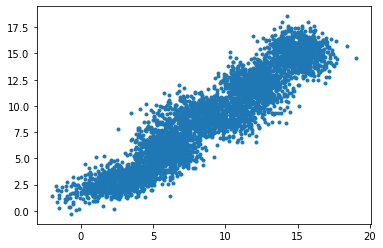

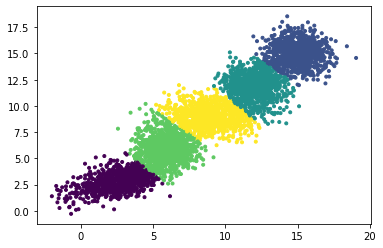

In [177]:
sigma[0, :] = [[3, 1], [1, 1]]

X = generate(N, d, K, p, mi, sigma)

draw(X, K)

d) jak w c), oprócz p = [0.2; 0.1; 0.3; 0.1; 0.3]



100%|██████████| 5000/5000 [00:00<00:00, 136802.31it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

8it [00:00, 76.12it/s]               

18it [00:00, 66.58it/s]


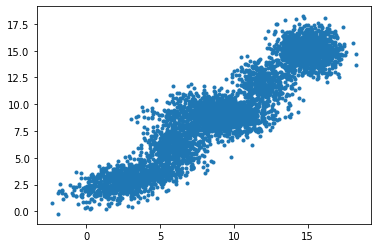

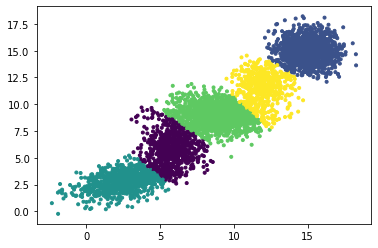

In [178]:
p = [0.2, 0.1, 0.3, 0.1, 0.3]

X = generate(N, d, K, p, mi, sigma)

draw(X, K)

e) jak w a), oprócz d=3 i Σ3 = [310;110;001]



100%|██████████| 5000/5000 [00:00<00:00, 116517.51it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

14it [00:00, 68.57it/s]              


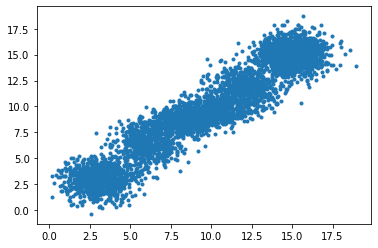

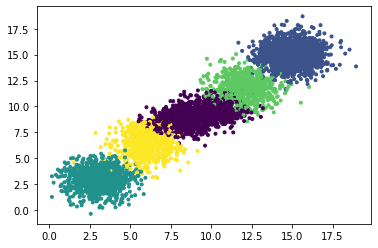

In [179]:
d = 3
mi = 3 * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
sigma = np.array([np.eye(d)] * K)
sigma[2, :] = [[3, 1, 1], [1, 1, 0], [0, 0, 1]]

X = generate(N, d, K, p, mi, sigma)
draw(X, K)

f) jak w a), oprócz d = 100 i K = 10.
(1 to wektor odpowiedniej długości złożony z samych jedynek, I to macierz identycznościowa).
Jak pogrupowałbyś te dane, jeśli nie znałbyś wartości K użytej w generatorze?

100%|██████████| 5000/5000 [00:00<00:00, 133393.04it/s]
 56%|█████▌    | 28/50.0 [00:00<00:00, 68.96it/s]


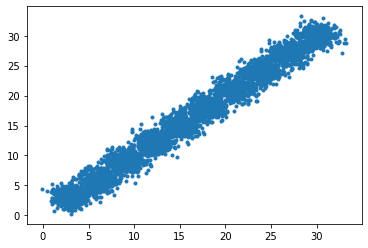

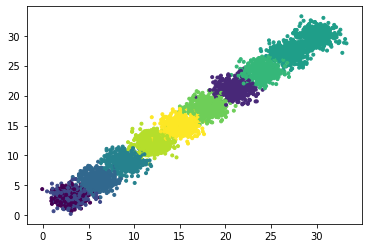

In [167]:
d, K = 100, 10
p = np.ones(K) / K
mi = 3 * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
sigma = np.array([np.eye(d)] * K)

X = generate(N, d, K, p, mi, sigma)
draw(X, K)

### Zadanie 2.
Wygeneruj zbiór N = 1000000 losowych danych z d = 1000 wymiarowej mieszaniny K = 1000 rozkładów gaussowskich takiej, że odległość między środkami μk każdych dwóch rozkładów tej mieszaniny jest nie mniejsza niż q = 10. Prawdopodobieństwa wyboru rozkładów mogą być równe, p = 1/K * 1, a same rozkłady mogą mieć nieskorelowane zmienne, Σk = I. Sprawdź działanie algorytmu K-Means na tym zbiorze. Poeksperymentuj z innymi wartościami parametru q.

100%|██████████| 100000/100000 [00:00<00:00, 104314.02it/s]
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


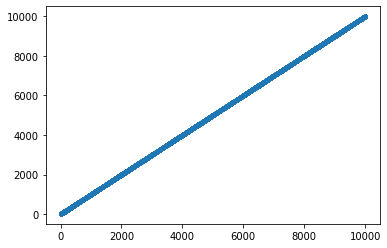

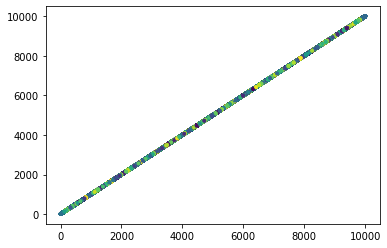

In [17]:
N, d, K, q = 100000, 100, 1000, 10
p = np.ones(K) / K 
mi = q * np.ones([1, d]) * np.arange(1, K + 1)[:, np.newaxis]
sigma = np.array([np.eye(d)] * K)

X = generate(N, d, K, p, mi, sigma)
draw(X, K)

### Zadanie 3.
W UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/) można znaleźć przykładowe dane do testowania działania algorytmów eksploracji danych. Pobierz 5 zestawów danych (Iris, Wine oraz 3 inne wybrane przez siebie). Zapoznaj się z opisem tych danych. Spróbuj opisać charakterystykę tych danych. Spróbuj przedstawić te dane na wykresach. Sprawdź jak dobrze można je pogrupować za pomocą znanych Ci algorytmów grupowania (sprawdź co najmniej K- Means).

In [70]:
# load dataframes

# wine
wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine_df = pd.read_csv(wine_url, header=None, 
                      names=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoi_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315', 'proline'])

# transfusion
# R (Recency - months since last donation), 
# F (Frequency - total number of donation), 
# M (Monetary - total blood donated in c.c.), 
# T (Time - months since first donation), and 
# a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). 
transfusion_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'
transfusion_df = pd.read_csv(transfusion_url, header=None,
                            names=['since_last', '#donations', 'blood_donated', 'since_first', 'donated_03.07']).iloc[1:,:]

# flags
flags_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'
flags_df = pd.read_csv(flags_url, header=None,
                       names=['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'main_hue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstart', 'crescent_moon', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botomleft'])

# reviews
reviews_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv'
reviews_df = pd.read_csv(reviews_url, header=None,
                         names=['id', 'art_galleries', 'clubs', 'bars', 'restaurants', 'museums', 'resorts', 'parks', 'beaches', 'theaters', 'religious']).iloc[1:, 1:]

k_means:   9%|▉         | 9/100 [00:00<00:00, 980.92it/s]
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


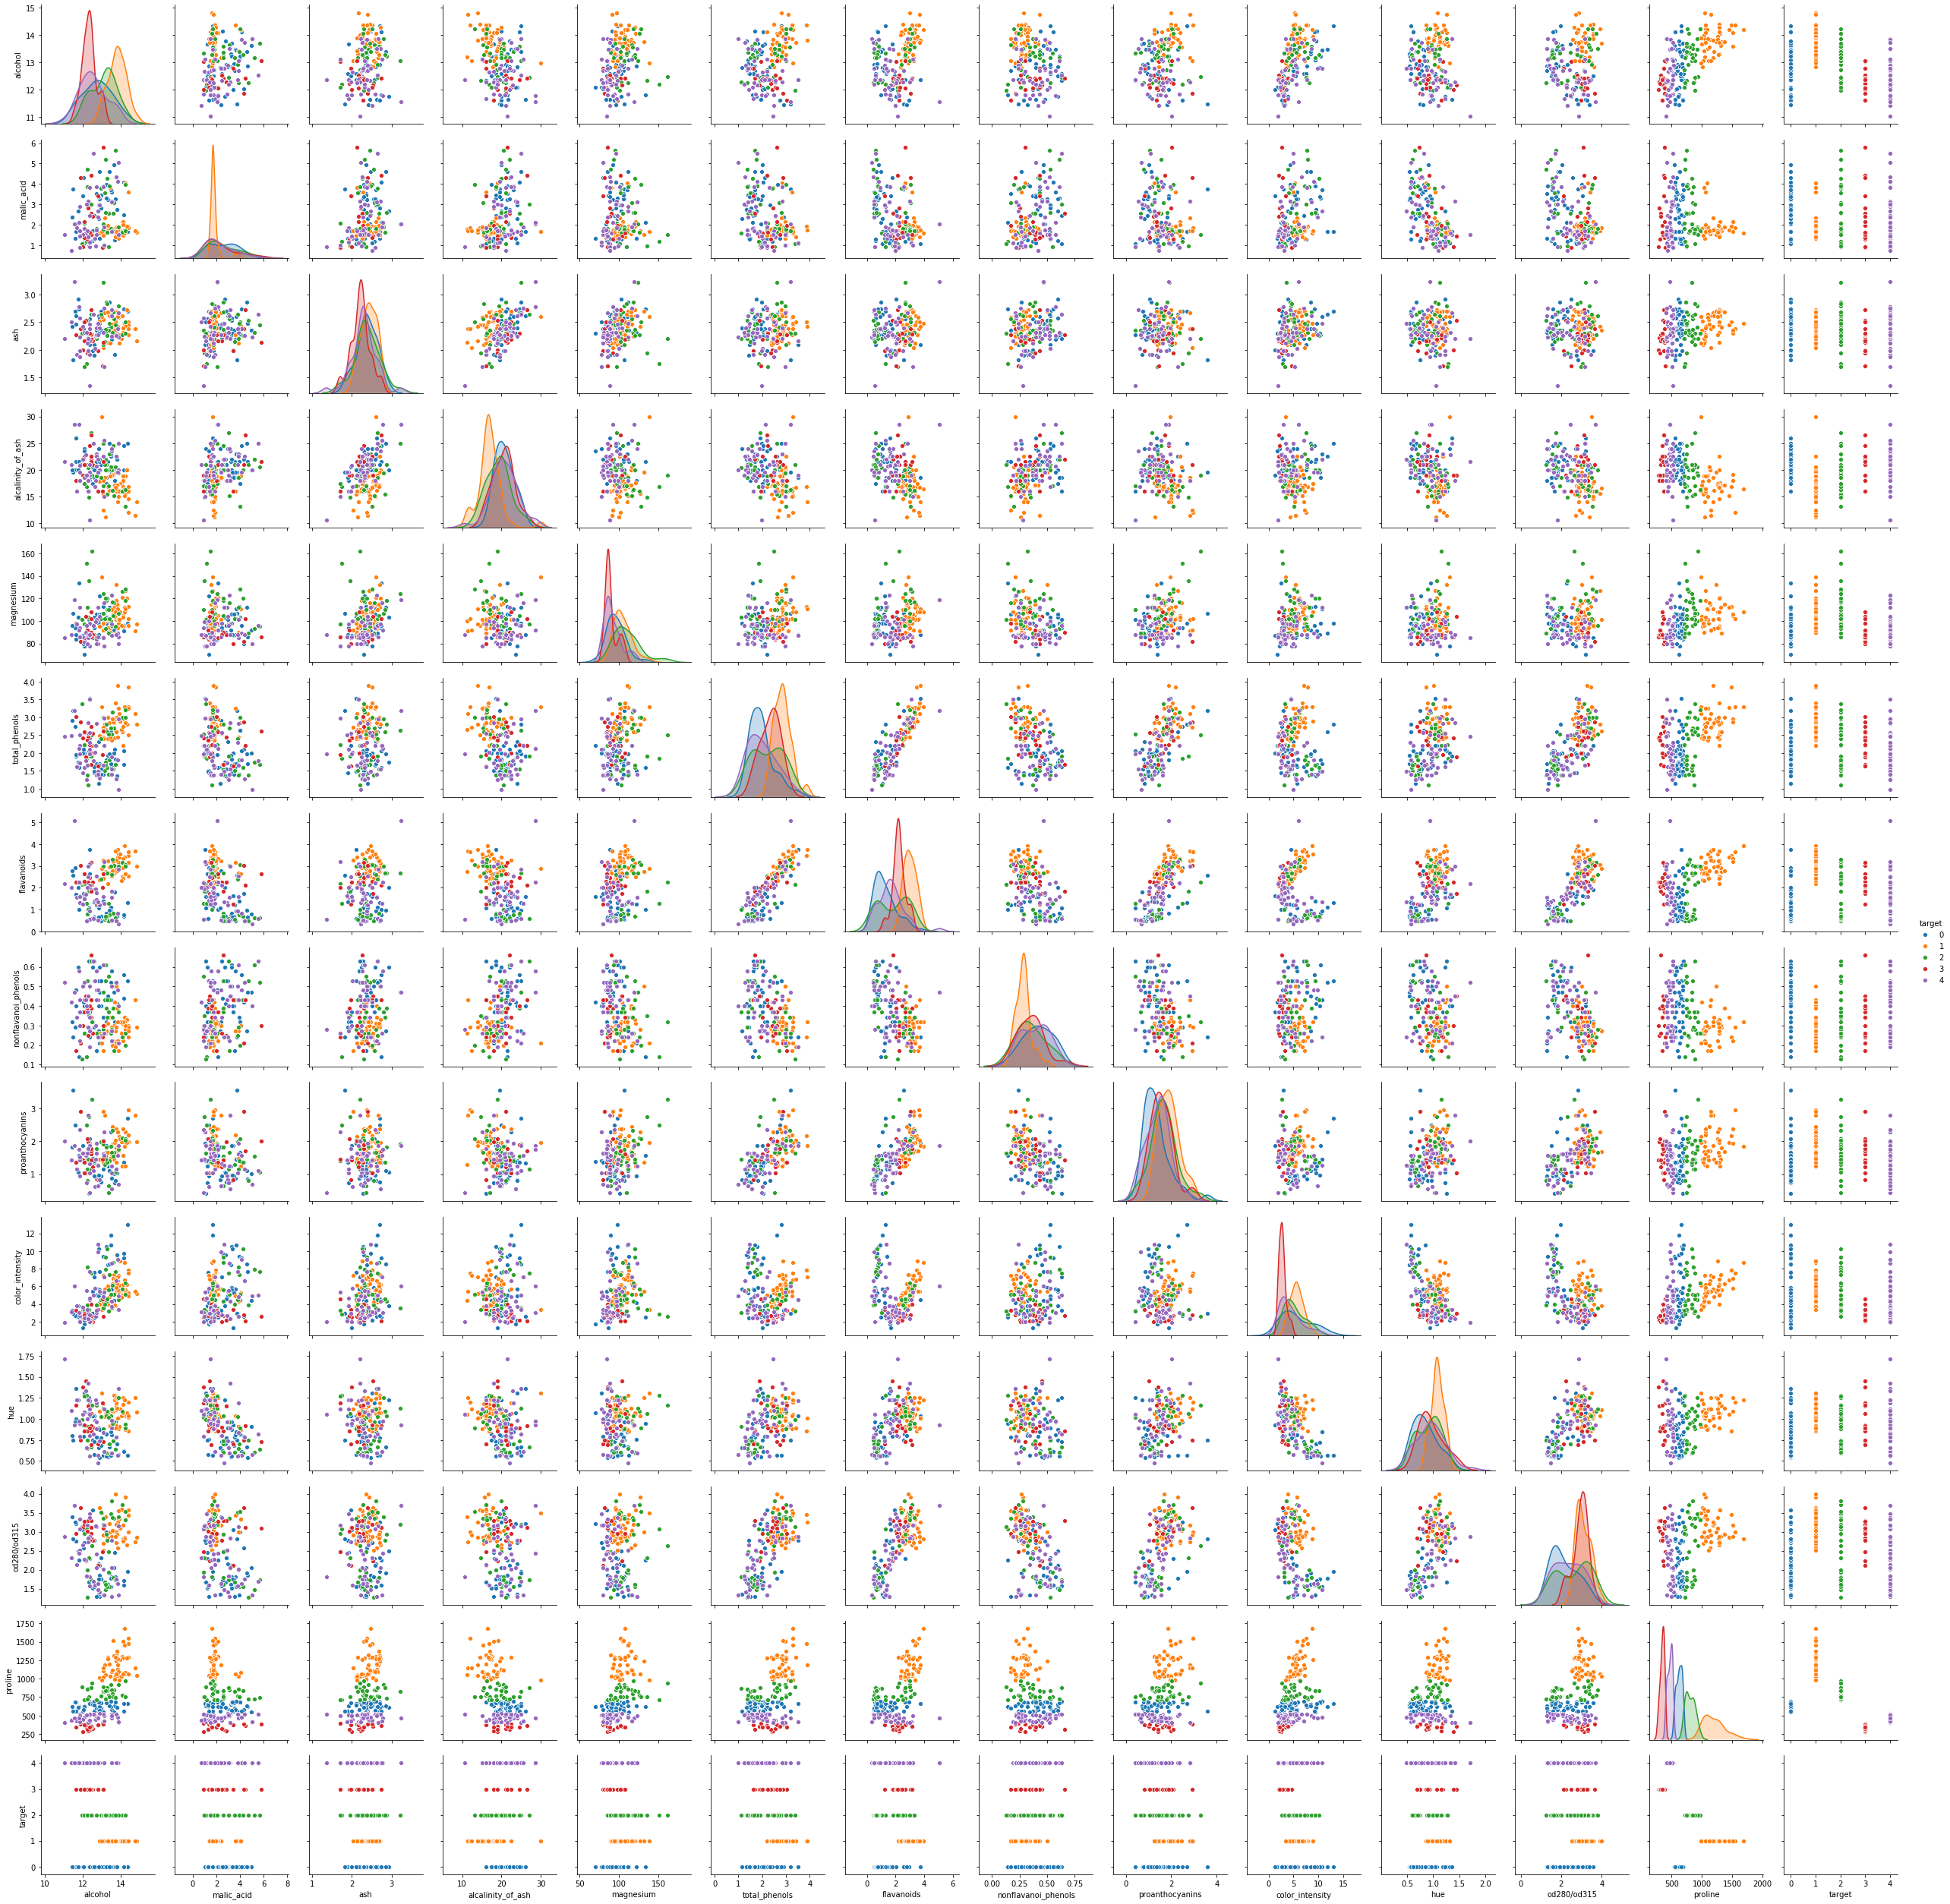

In [41]:
groups, centroids = k_means(np.array(wine_df), 5)
wine_kmeans_df = wine_df.copy()
wine_kmeans_df['target'] = groups
sns.pairplot(wine_kmeans_df, hue='target')

k_means:  12%|█▏        | 12/100 [00:00<00:00, 278.47it/s]


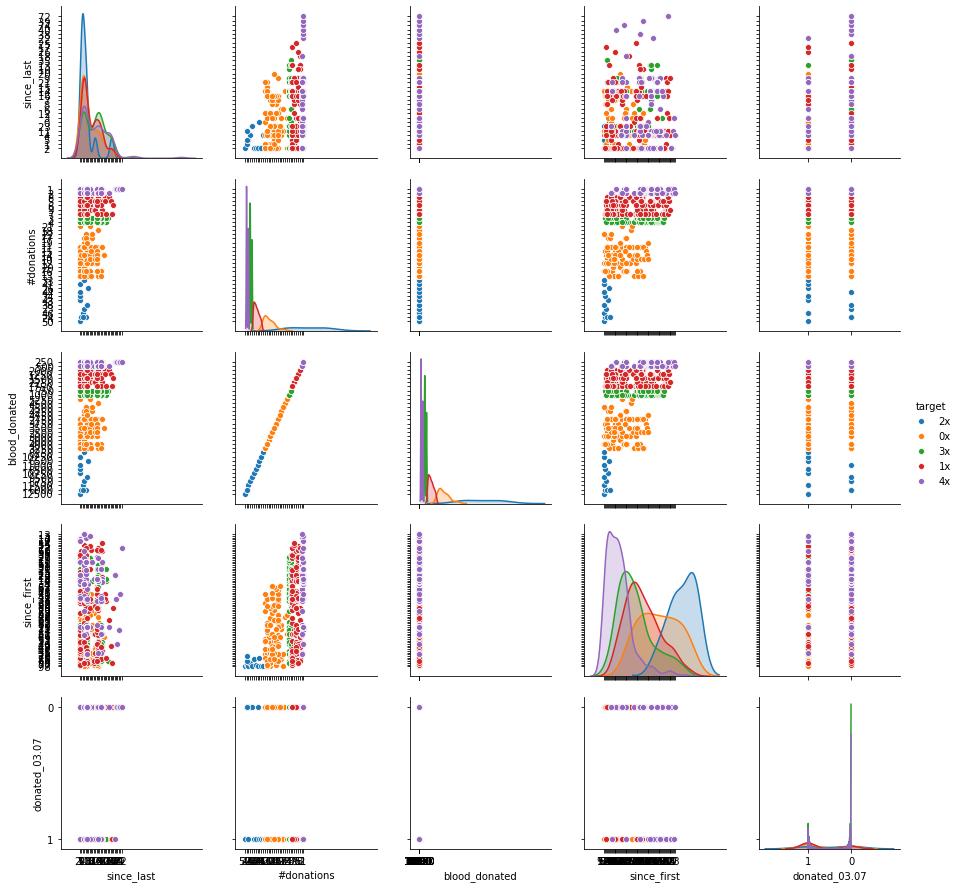

In [77]:
groups, _ = k_means(np.array(transfusion_df, dtype=float), 5)
transfusion_kmeans_df = transfusion_df.copy()
transfusion_kmeans_df['target'] = list(map(lambda x : str(x) + 'x', groups))
sns.pairplot(transfusion_kmeans_df, hue='target')

In [ ]:
groups, _= k_means(np.array(reviews_df, dtype=float), 5)
reviews_kmeans_df = reviews_df.copy()
reviews_kmeans_df

### Zadanie 4.
Zdjęcie fotograficzne o rozdzielczości A x B w formacie RGB można traktować jako zbiór N = A * B trójwymiarowych punktów danych. Po przeprowadzeniu grupowania takich danych, z liczbą grup K, można obniżyć liczbę kolorów zdjęcia do K (tworząc paletę K kolorów określonych przez środki uzyskanych grup, a następnie zastępując kolor każdego piksela najbliższym mu kolorem ze stworzonej palety). Napisz program wczytujący zdjęcie z pliku JPG (polecenie imread w Matlabie lub w Pythonie), redukujący liczbę kolorów w powyższy sposób i wyświetlający zredukowane zdjęcie na ekranie. Sprawdź działanie programu na 5 wybranych przez siebie zdjęciach.

In [10]:
paths = ['img/coffee-resized.jpg', 'img/leniwce.jpg', 'img/spacex.jpg', 'img/tecza.jpg', 'img/piast.jpg']

def reduce_colors(path, k, max_iters=None):
    img = np.array(Image.open(path))
    display(Image.open(path))
    if max_iters is None:
        group_class, colors = k_means(img.reshape(img.shape[0] * img.shape[1], img.shape[2]), k)
    else:
        group_class, colors = k_means(img.reshape(img.shape[0] * img.shape[1], img.shape[2]), k, max_iters=max_iters)
        
    train = img.copy().reshape(img.shape[0] * img.shape[1], img.shape[2])
    
    for i in range(k):
        train[group_class == i] = colors[i]
        
    train = train.reshape(img.shape)
    display(Image.fromarray(train, 'RGB'))

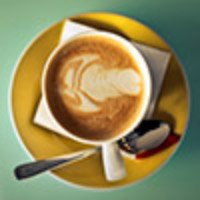

k_means: 100%|██████████| 100/100 [00:13<00:00,  7.48it/s]


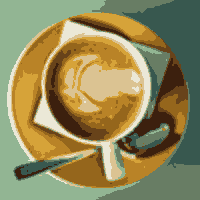

In [11]:
k = 10
reduce_colors(paths[0], k)

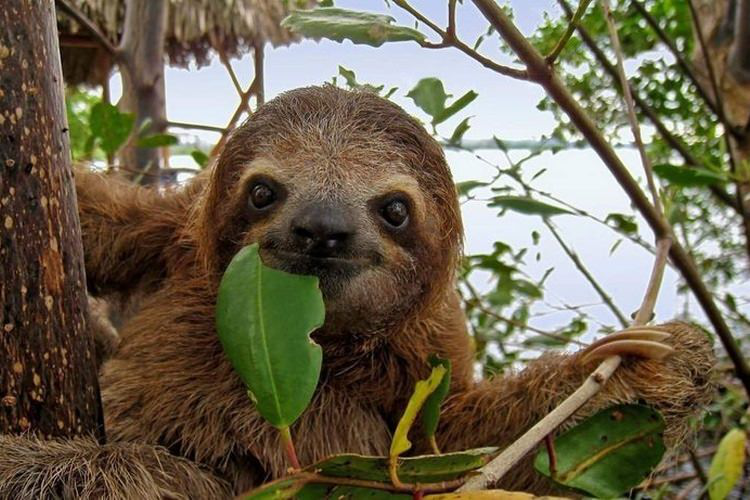

k_means: 100%|██████████| 50/50 [01:00<00:00,  1.22s/it]


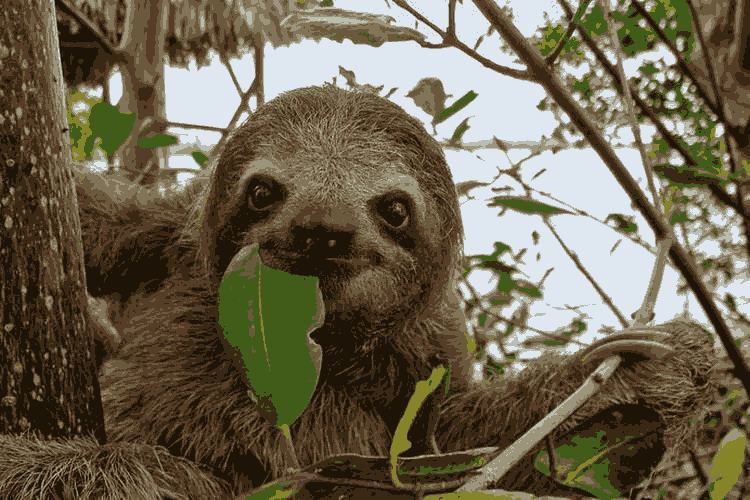

In [28]:
reduce_colors(paths[1], k, 50)

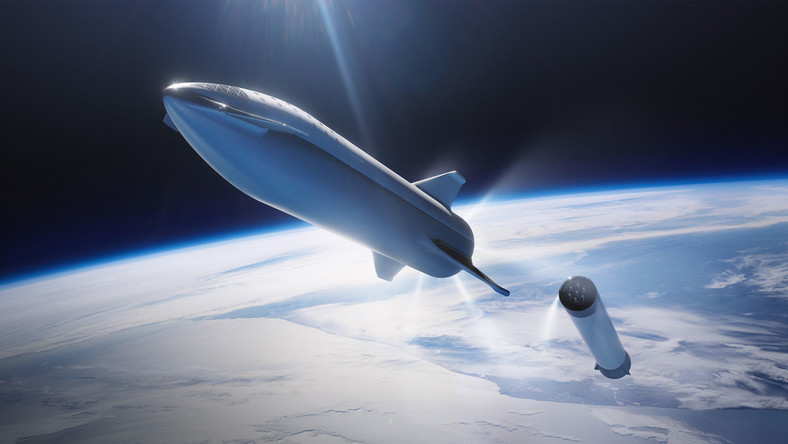

k_means:  96%|█████████▌| 48/50 [00:50<00:02,  1.05s/it]


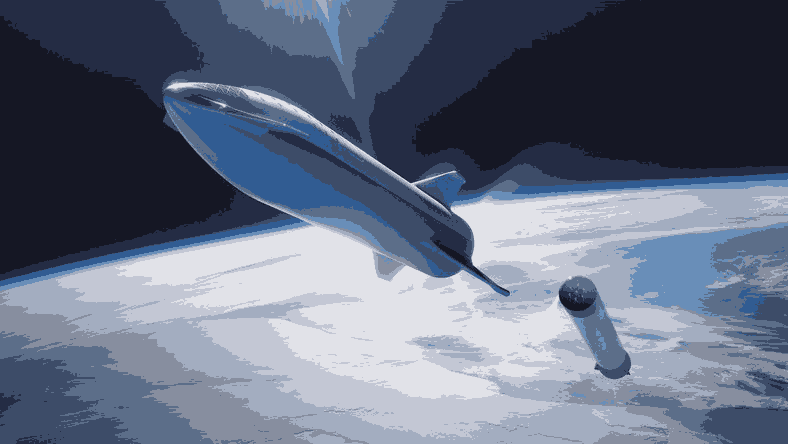

In [231]:
reduce_colors(paths[2], k, 50)

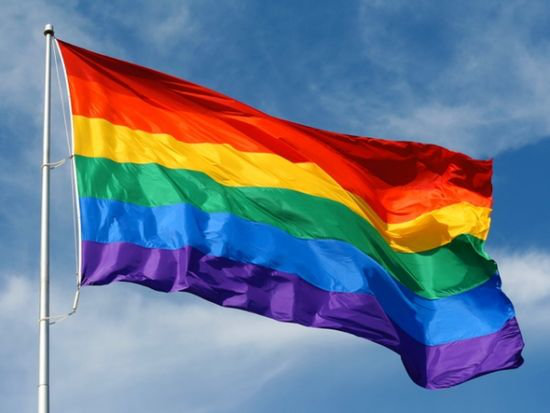

k_means:  38%|███▊      | 19/50 [00:12<00:21,  1.47it/s]


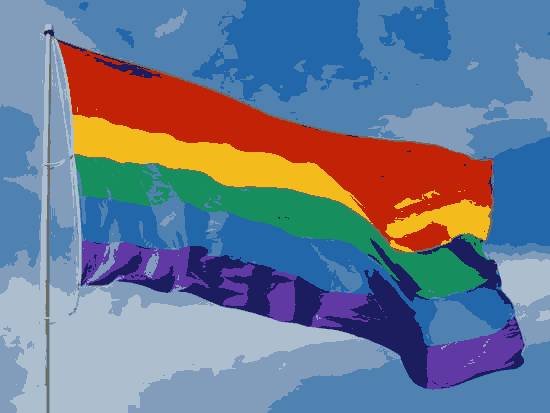

In [232]:
reduce_colors(paths[3], k, 50)

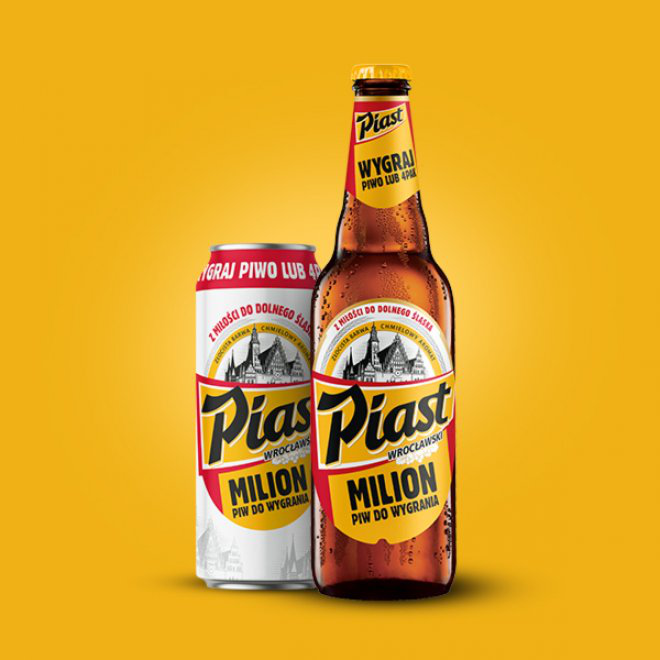

k_means:  56%|█████▌    | 28/50 [00:38<00:30,  1.38s/it]


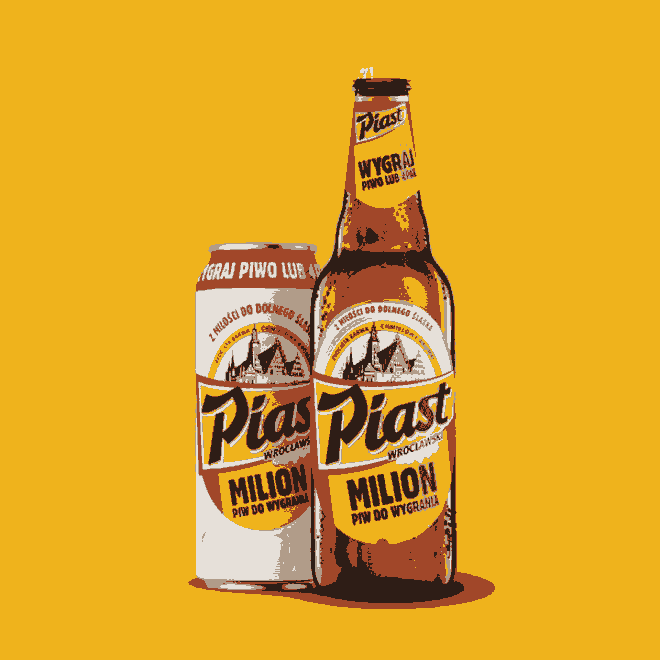

In [12]:
reduce_colors(paths[4], 5, 50)

### Zadanie 5.
Zbiór danych Kosarak (stworzony przez Ferenca Bodona, dostępny m.in. na http://fimi.ua.ac.be/data/kosarak.dat.gz) zawiera informacje o transakcjach zawartych w sieci supermarketów. Każdy wiersz tego pliku reprezentuje jedną transakcję i zawiera identyfikatory produktów kupionych w tej transakcji.

a) Wyznacz T = 1000 najczęściej kupowanych produktów (tzn. produktów, które pojawiły się w największej liczbie transakcji). Oznaczmy je kolejno Z1, Z2, ..., ZT.

b) Dla każdego produktu, policz ile razy był on kupowany razem z produktem Zi (dla i =1, 2, ..., T) tworząc w ten sposób wektor liczbowy p = (p1, p2, ..., pT) opisujący dany produkt.

c) Pogrupuj produkty używając ich powyższej reprezentacji oraz algorytmu K-Means z różną liczbą grup (poeksperymentuj).

Przedstaw wyniki swoich eksperymentów. Możesz także poeksperymentować z parametrem T. Które grupy produktów można uznać za szczególnie istotne, a które za raczej przypadkowe?